# Import Required Modules

In [5]:
from csv import reader
import tsfel
import pandas as pd
from statsmodels.tsa.ar_model import AR

# Reading timeseries dataset and converting it into list of lists

In [6]:
tsli=[]
with open('hctsa_timeseries-data.csv','r') as read_obj:
    csv_reader=reader(read_obj)
    li=list(csv_reader)
    for i in li:
        tsli.append(list(map(float,i)))

# Extracting features from timeseries dataset with TSFEL and saving it into csv file

In [ ]:
fvector=[]
# funcname=input("enter function        ##########   each timeseries passes through model for feature vector   ########### 
from statsmodels.tsa.ar_model import AR

cfg=tsfel.get_features_by_domain()
tsfelldatamatrix=tsfel.time_series_features_extractor(cfg,tsli)

# Passing timeseries dataset through Analysismodel and generating feature vector.

In [8]:
fvector=[]
for i in tsli:
    model=AR(i)
    model_fit=model.fit()
    yhat=model_fit.predict(len(i),len(i))
    fvector.append(yhat)

c:\users\dell\python37\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)



# Reading feature matrix and their names

In [9]:
tsmatrix=pd.read_csv('tsfeldatamatrix.csv',header=None)
featurename=pd.read_csv('tsfelfeaturename.csv',header=None)

# Excluding columns from featurematrix having missing data more than threshold limit.

In [10]:


def rmissingcol(dff,threshold):
    final=[]
    missing=[]
    final=list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns,1).columns.values)
    print("#columns having more than %s percent missing values : "%threshold,(dff.shape[1]-len(final)))
    missing.append(list(set(list((dff.columns.values)))-set(final)))
    for i in missing:
        for j in i:
            print(featurename.loc[j,0],f'({j})')
    return final
finalfeatures=rmissingcol(tsmatrix,30)

#columns having more than 30 percent missing values :  0


# Finding spearman's correlation betwwen each feature and newly generated feature vector.

In [11]:
from scipy.stats import spearmanr
alpha=0.05
vis=[]
correlatedfeatures=dict()
for i in finalfeatures:
    try:
        coef, p = spearmanr(tsmatrix[i], fvector)
        if p < alpha:
            fec={coef:i}
            vis.append(i)
            correlatedfeatures.update(fec)
    except BaseException as b:
        print(b)
bestmatches={k:correlatedfeatures[k] for k in sorted(correlatedfeatures.keys())[-10:]}
columnnumber=[]
for i in bestmatches.values():
    columnnumber.append(i)
columnnumber.reverse()

# Plotting the best matches 

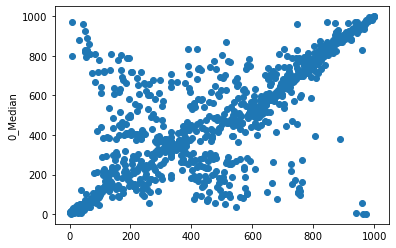

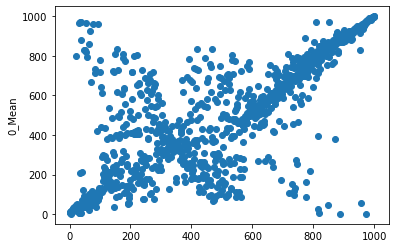

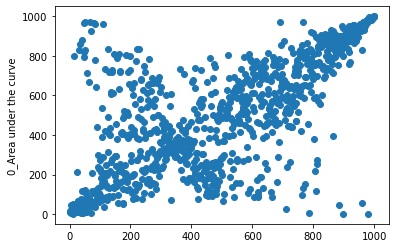

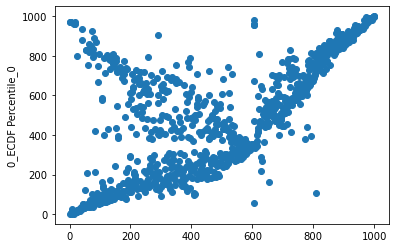

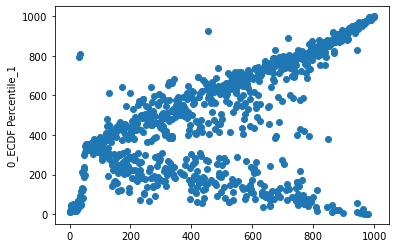

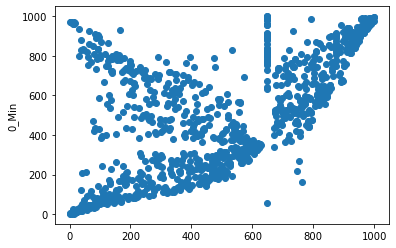

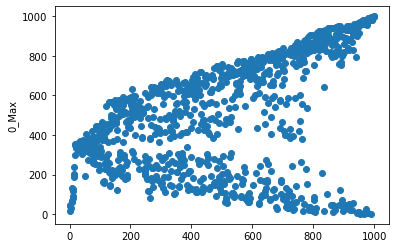

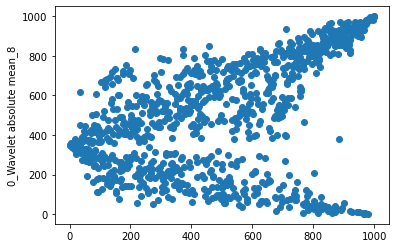

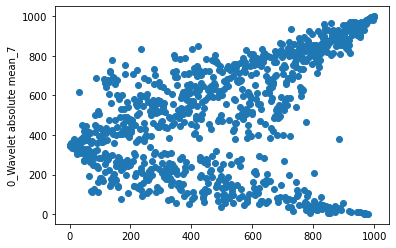

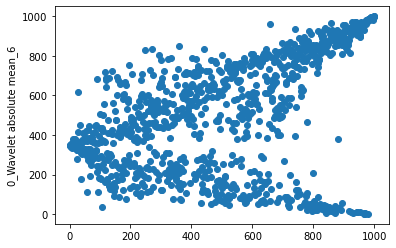

In [12]:
import matplotlib.pyplot as plt
for i in columnnumber:
    plt.scatter(pd.Series(tsmatrix[i]).rank(),pd.Series(fvector).rank())
    plt.xlabel=("usermethod")
    plt.ylabel(featurename.loc[i,0])
    plt.show()